### In this project, I will use Python to analyze data from Uber and answer key business questions: 

#### Check how long do people travel with Uber?
#### What Hour Do Most People Take Uber To Their Destination?
#### Check The Purpose Of Trips
#### Which Day Has The Highest Number Of Trips ?
#### What Are The Number Of Trips Per Each Day?
#### What Are The Trips In The Month?
#### The starting points of trips. Where Do People Start Boarding Their Trip From Most?

In [25]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import calendar 

In [9]:
uber = pd.read_csv('/Users/AbdurRahman/Downloads/Uber Drives - .csv')
uber.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


### Checking for Mising Values 

In [10]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [11]:
uber.isnull()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False
1154,False,False,False,False,False,False,False


In [15]:
uber.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [14]:
uber.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

### I will drop all the NaN values in the dataset
Note: Dropping a vlaue in the dataset should be the last option.  

In [16]:
uber = uber.dropna()

In [17]:
# Let's check again 
uber.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [26]:
# checking Data types
uber.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [35]:
# Converting START_DATE and END_DATE to datetime 
uber['START_DATE*'] = pd.to_datetime(uber['START_DATE*'], format = '%m/%d/%Y  %H:%M')
uber['END_DATE*'] = pd.to_datetime(uber['END_DATE*'], format = '%m/%d/%Y %H:%M')

In [36]:
# Let's check again
uber.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [46]:
hour = []
day = []
dayofweek = []
month = []
weekday = []

for x in uber['START_DATE*']:
 hour.append(x.hour)
 day.append (x.day)
 dayofweek.append(x.dayofweek)
 month.append(x.month)
 weekday.append(calendar.day_name[dayofweek[-1]])

uber['Hour'] = hour
uber['DAY'] = day
uber['DAY OF WEEK'] = dayofweek
uber['MONTH'] = month
uber['WEEKDAY'] = weekday

In [47]:
# Lets see new columns created 
uber.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Hour,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


## Check Categories 

In [51]:
uber['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

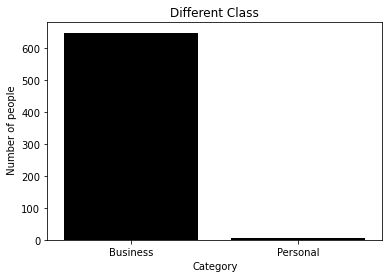

In [81]:
# countplot
sns.countplot( x = 'CATEGORY*', data = uber, color = '#000000')
plt.xlabel('Category')
plt.ylabel(' Number of people')
plt.title('Different Class')
plt.show()

## How long do people travel with uber?

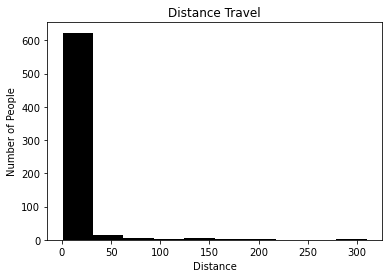

In [80]:
uber['MILES*'].plot.hist(color = '#000000')
plt.xlabel('Distance')
plt.ylabel('Number of People')
plt.title('Distance Travel')
plt.show()

We can see most people travel shorter distance between 1 and 50 mile. It is very rare that people are booking the uber for long distance > 50 mile.

## What Hour Do Most People Take Uber To Their Destination?

In [69]:
hour = uber['START_DATE*'].dt.hour.value_counts()

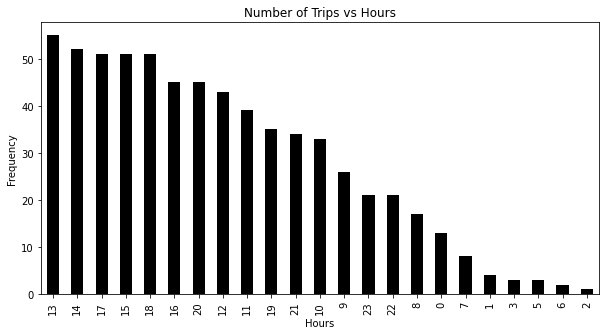

In [79]:
hour.plot(kind = 'bar', color = '#000000', figsize = (10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of Trips vs Hours')
plt.show()

We can see the most people book their uber around 1pm till 6 pm, as they travel for work purposes or maybe they are travelling back to home at 5 pm to 6 pm. On the other hand, less people are booking uber at 1 am till 6 am. Therefore, Uber would be willing to spending more money on advertisement during 1 pm to 6 pm, so that they can reach out to more poeple.       

## Check The Purpose Of Trips

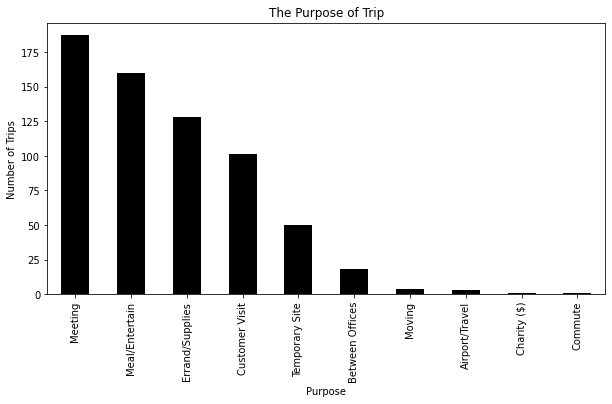

In [78]:
uber['PURPOSE*'].value_counts().plot(kind = 'bar', figsize = (10,5), color = '#000000')
plt.xlabel('Purpose')
plt.ylabel('Number of Trips')
plt.title('The Purpose of Trip')
plt.show()

This is very important because if Uber knows the purpose of trips, they can talior made the offer for their customers and also it will help them build an advertisement for customers. We can see from the bar graph most people are using uber for meeting followed by meal/entertainment. And less people are using Uber for moving/Travel. Therefore, they should target people who are booking Uber for meeting because they are the high priority customers. 

## Which Day Has The Highest Number Of Trips ?

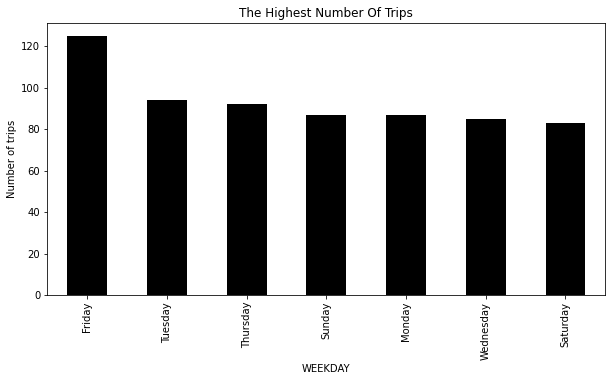

In [82]:
uber['WEEKDAY'].value_counts().plot(kind = 'bar', figsize = (10,5), color = '#000000')
plt.xlabel('WEEKDAY')
plt.ylabel('Number of trips')
plt.title('The Highest Number Of Trips')
plt.show()

We can see Friday is the day most customers book their Uber and followed by Tuesday and Thursday. 

## What Are The Number Of Trips Per Each Day?

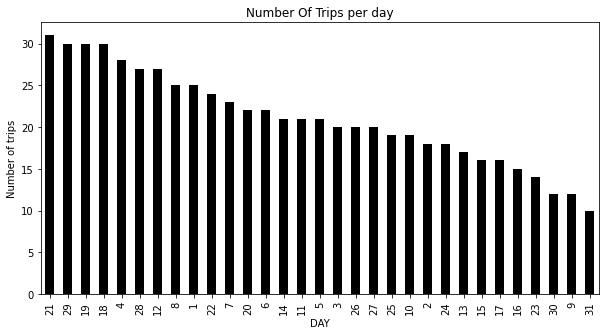

In [86]:
uber['DAY'].value_counts().plot(kind = 'bar', figsize = (10,5), color = '#000000')
plt.xlabel('DAY')
plt.ylabel('Number of trips')
plt.title('Number Of Trips per day')
plt.show()

We can see from the graph the less people book Uber on the last day of the month. The most people book uber during third week of the month.

## What Are The Trips In The Month?

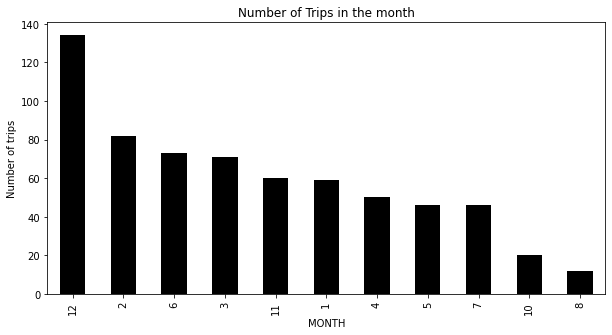

In [87]:
uber['MONTH'].value_counts().plot(kind = 'bar', figsize = (10,5), color = '#000000')
plt.xlabel('MONTH')
plt.ylabel('Number of trips')
plt.title('Number of Trips in the month')
plt.show()

We can see in the December many customers book the Uber, it could be because it's a holiday period. And August is the less month people book Uber. 

## The starting points of trips. Where Do People Start Boarding Their Trip From Most?

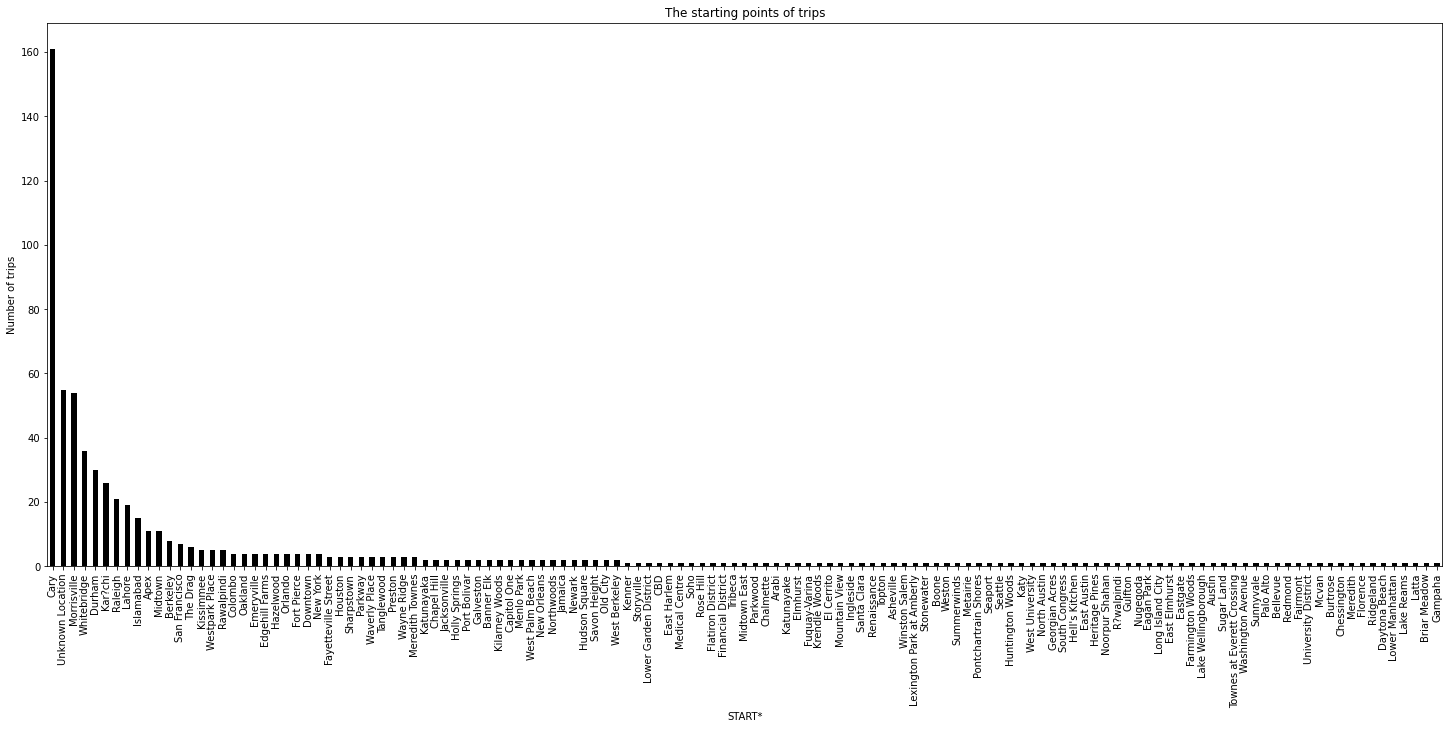

In [93]:
uber['START*'].value_counts().plot(kind = 'bar', figsize = (25,10), color = '#000000')
plt.xlabel('START*')
plt.ylabel('Number of trips')
plt.title('The starting points of trips')
plt.show()